In [ ]:
import numpy as np
import os
import csv

# Function to randomly initialize a board with exactly `num_alive` live cells
def initialize_board(rows, cols, num_alive):
    """
    Initialize a 2D board with a 50% distribution of live (1) and dead (0) cells.

    Parameters:
    rows (int): Number of rows in the board.
    cols (int): Number of columns in the board.

    Returns:
    numpy.ndarray: A 2D numpy array representing the initialized board.
    """
    total_cells = rows * cols
    assert num_alive <= total_cells, "Number of live cells exceeds board size"

    # Create a flattened array with the specified number of alive (1) and dead (0) cells
    flat_board = np.array([1] * num_alive + [0] * (total_cells - num_alive))
    np.random.shuffle(flat_board)

    # Reshape it to the board size
    board = flat_board.reshape((rows, cols))
    return board

# Function to save the board to a CSV file
def save_board_to_csv(board, filename="boards/initial_board.csv"):
    """
    Save the board to a CSV file.

    Parameters:
    board (numpy.ndarray): The board to save.
    filename (str): The path to the output CSV file.
    """    
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    np.savetxt(filename, board, delimiter=',', fmt='%d')

# === Settings for 5000 cells on a 50% filled board ===
num_alive = 5000
occupancy = 0.5
total_cells = int(num_alive / occupancy)
side_length = int(np.sqrt(total_cells))  # Create roughly square board

rows = cols = side_length  # square board, e.g., 100x100 = 10,000 cells

# Initialize the board
board = initialize_board(rows, cols, num_alive)

# Save the board
save_board_to_csv(board, "boards/random.csv")

## Figure 1

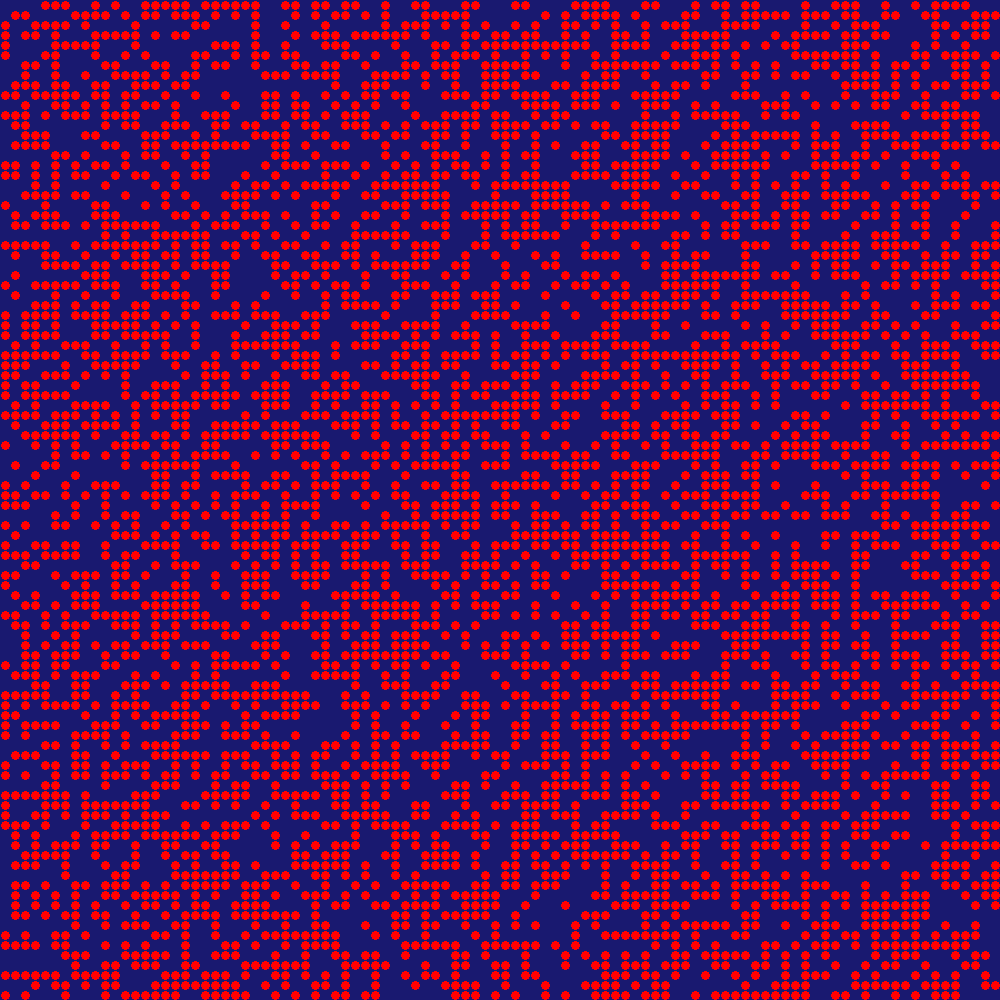

In [13]:
from base_functions import play_game_of_life
from io_utils import read_board_from_file
from draw import draw_game_boards, save_gif, draw_game_board  # Added draw_game_board here

from IPython.display import Image as IPImage

# Parameters
input_file = "boards/random.csv"
output_gif = "output/random.gif"
final_image_file = "output/final_board.png"
cell_width = 10
num_gens = 100

# Run simulation
initial_board = read_board_from_file(input_file)
boards = play_game_of_life(initial_board, num_gens)

# Draw and save GIF
images = draw_game_boards(boards, cell_width=cell_width, bg_color='midnightblue', cell_color='red', shape='circle_inset')
save_gif(images, output_gif, duration=50)

# Save final board as PNG
final_image = draw_game_board(boards[-1], cell_width=cell_width, bg_color='midnightblue', cell_color='red', shape='circle_inset')
final_image.save(final_image_file)

# Display GIF inline (for Jupyter notebook)
IPImage(output_gif)


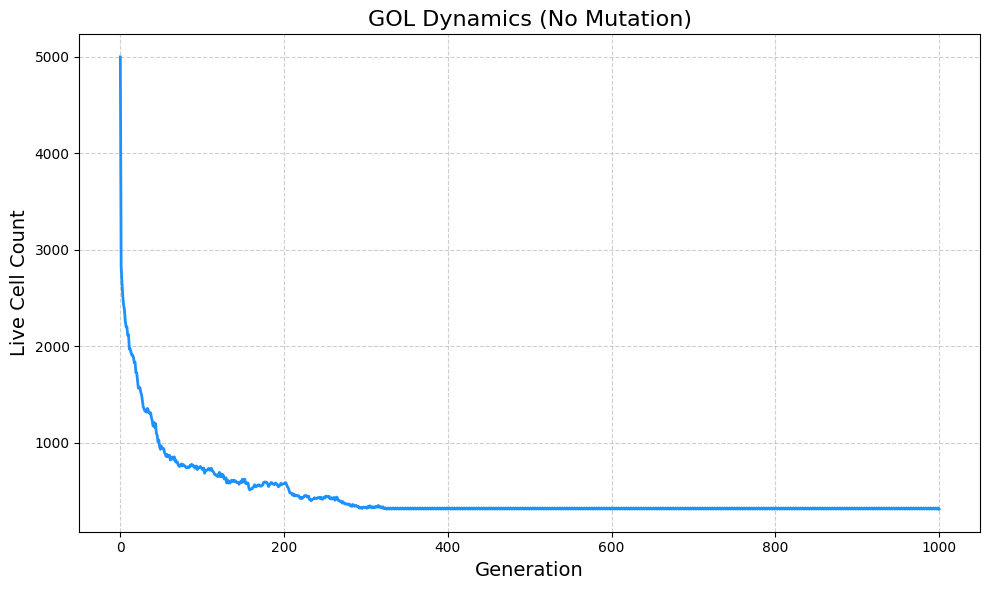

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# === Parameters ===
input_file = "boards/random.csv"
num_gens = 1000

# === Step 1: Load board and run simulation ===
initial_board = read_board_from_file(input_file)
boards = play_game_of_life(initial_board, num_gens=num_gens)

# === Step 2: Count live cells per generation ===
live_counts = [np.sum(board) for board in boards]

# === Step 3: Plot population dynamics ===
plt.figure(figsize=(10, 6))
plt.plot(range(len(live_counts)), live_counts, color='dodgerblue', linewidth=2)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Live Cell Count', fontsize=14)
plt.title('GOL Dynamics (No Mutation)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("output/gol_population_dynamics.png")
plt.show()


## Figure 2


--- Starting runs for mutation rate 0.0 ---
Run 1/77 → Rate: 0.0, Magnitude: 0.25
    ↳ Steady state reached at generation: 1000
Run 2/77 → Rate: 0.0, Magnitude: 0.5
    ↳ Steady state reached at generation: 1000
Run 3/77 → Rate: 0.0, Magnitude: 0.75
    ↳ Steady state reached at generation: 1000
Run 4/77 → Rate: 0.0, Magnitude: 1.0
    ↳ Steady state reached at generation: 1000
Run 5/77 → Rate: 0.0, Magnitude: 1.5
    ↳ Steady state reached at generation: 1000
Run 6/77 → Rate: 0.0, Magnitude: 2
    ↳ Steady state reached at generation: 1000
Run 7/77 → Rate: 0.0, Magnitude: 3
    ↳ Steady state reached at generation: 1000
Run 8/77 → Rate: 0.0, Magnitude: 4
    ↳ Steady state reached at generation: 1000
Run 9/77 → Rate: 0.0, Magnitude: 5
    ↳ Steady state reached at generation: 1000
Run 10/77 → Rate: 0.0, Magnitude: 6
    ↳ Steady state reached at generation: 1000
Run 11/77 → Rate: 0.0, Magnitude: 10
    ↳ Steady state reached at generation: 1000

--- Starting runs for mutation rate 0

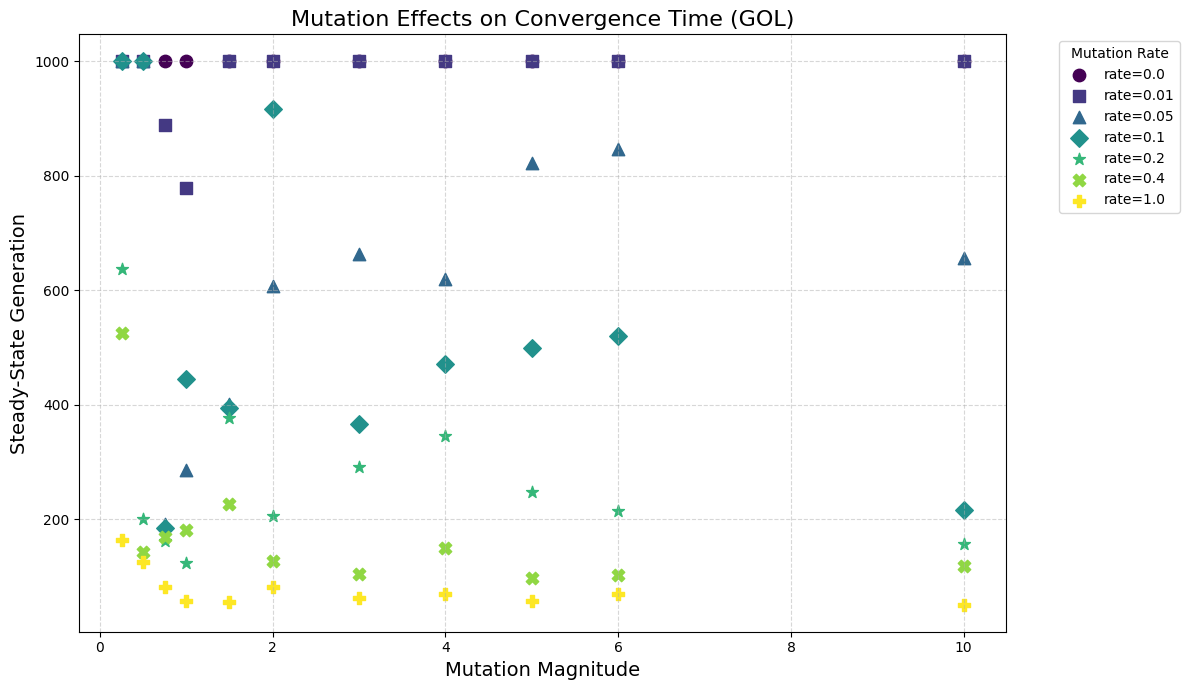

In [18]:
from mutation_functions import play_game_of_life_with_mutation
from io_utils import read_board_from_file
import matplotlib.pyplot as plt
import numpy as np  # Make sure this is imported if you're using np.linspace

# Parameters
mutation_rates = [0.0, 0.01, 0.05, 0.1, 0.2, 0.4, 1.0]
mutation_magnitudes = [0.25, 0.5, 0.75, 1.0, 1.5, 2, 3, 4, 5, 6, 10]
initial_board = read_board_from_file("boards/random.csv")

# Store results: (mutation_rate, mutation_magnitude, steady_state_gen)
results = []

total_runs = len(mutation_rates) * len(mutation_magnitudes)
run_count = 1

for rate in mutation_rates:
    print(f"\n--- Starting runs for mutation rate {rate} ---")
    for mag in mutation_magnitudes:
        print(f"Run {run_count}/{total_runs} → Rate: {rate}, Magnitude: {mag}")
        gen = play_game_of_life_with_mutation(initial_board, num_gens=1000,
                                              mutation_rate=rate, mutation_magnitude=mag)
        print(f"    ↳ Steady state reached at generation: {gen}")
        results.append((rate, mag, gen))
        run_count += 1

# Plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(mutation_rates)))
markers = ['o', 's', '^', 'D', '*', 'X', 'P']

plt.figure(figsize=(12, 7))
for i, rate in enumerate(mutation_rates):
    xs = [mag for r, mag, gen in results if r == rate]
    ys = [gen for r, mag, gen in results if r == rate]
    plt.scatter(xs, ys, color=colors[i], marker=markers[i], label=f"rate={rate}", s=80)

plt.xlabel("Mutation Magnitude", fontsize=14)
plt.ylabel("Steady-State Generation", fontsize=14)
plt.title("Mutation Effects on Convergence Time (GOL)", fontsize=16)
plt.legend(title="Mutation Rate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("output/mutation_vs_steady_state.png")
plt.show()
